### HMM: CpG Islands
Using R for finding HMM (hidden Markov model) given observed data. Unfair coin example used (Which can be transformed to CpG Islands problem).

R kernel must be installed <br>
(see `README.md`)

Using `HMM`:

In [1]:
library(HMM)

Define original model:

In [2]:
# initial:
hmm_original = initHMM(c("A","B"),c("L","R"),
                       startProbs=c(0.9,0.1),
                       transProbs=matrix(c(.9,.5,.1,.5),2),
                       emissionProbs=matrix(c(.9,.5,.1,.5),2))
print(hmm_original)
# Sequence of observation
# a = sample(c(rep("L",100),rep("R",300)))
# b = sample(c(rep("L",300),rep("R",100)))
# observation = c(a,b)


$States
[1] "A" "B"

$Symbols
[1] "L" "R"

$startProbs
  A   B 
0.9 0.1 

$transProbs
    to
from   A   B
   A 0.9 0.1
   B 0.5 0.5

$emissionProbs
      symbols
states   L   R
     A 0.9 0.1
     B 0.5 0.5



Initial model:

In [3]:
hmm_init = initHMM(c("A","B"),c("L","R"),
                   transProbs=matrix(c(.5,.5,.5,.5),2),
                   emissionProbs=matrix(c(.5,.5,.5,.5),2))
print(hmm_init)

$States
[1] "A" "B"

$Symbols
[1] "L" "R"

$startProbs
  A   B 
0.5 0.5 

$transProbs
    to
from   A   B
   A 0.5 0.5
   B 0.5 0.5

$emissionProbs
      symbols
states   L   R
     A 0.5 0.5
     B 0.5 0.5



Generate observed data:

In [4]:
observations = simHMM(hmm_original, 300) 

In [5]:
observations$observation[1:7]
# observations

[1] "L" "R" "L" "L" "L" "L" "L"

Using Baum-Welch for model inference:<br>
(REF: https://en.wikipedia.org/wiki/Baum-Welch_algorithm)

In [6]:
# Baum-Welch
bw = baumWelch(hmm_init,observations$observation, maxIterations=900, 10)

Resulting model:

In [7]:
print(bw$hmm)

$States
[1] "A" "B"

$Symbols
[1] "L" "R"

$startProbs
  A   B 
0.5 0.5 

$transProbs
    to
from   A   B
   A 0.5 0.5
   B 0.5 0.5

$emissionProbs
      symbols
states         L         R
     A 0.8333333 0.1666667
     B 0.8333333 0.1666667



In [8]:
# print(baumWelch)

Using `aphid`:<br>
(REF: https://cran.r-project.org/web/packages/aphid/vignettes/aphid-vignette.html)

In [9]:
library("aphid")

Registered S3 method overwritten by 'openssl':
  method      from
  print.bytes Rcpp

Attaching package: ‘aphid’

The following objects are masked from ‘package:HMM’:

    backward, forward, posterior



Original model:

        to
from     Begin unfair fair
  Begin      0    0.9  0.1
  unfair     0    0.9  0.1
  fair       0    0.5  0.5
[1] "unfair" "fair"  
        coins
states     1   2
  unfair 0.9 0.1
  fair   0.5 0.5


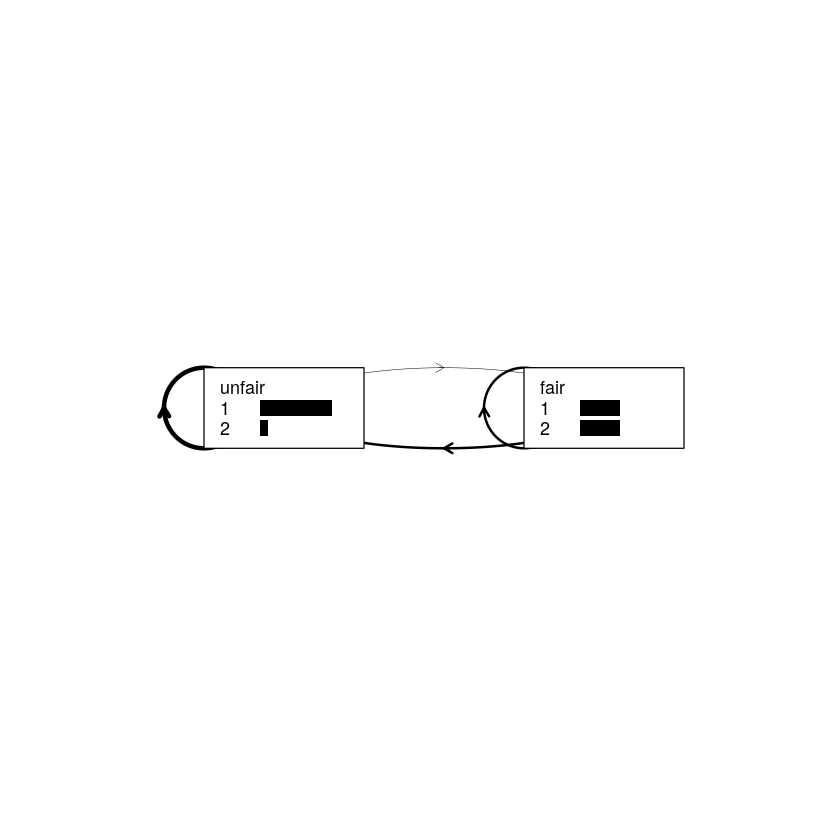

In [10]:
states <- c("Begin", "unfair", "fair")
coins <- 1:2

### Define transition probability matrix A
A <- matrix(c(0, 0, 0,
              0.9, 0.9, 0.5,
              0.1, 0.1, 0.5), nrow = 3)
dimnames(A) <- list(from = states, to = states)
print(A)

### Define emission probability matrix E
E <- matrix(c(0.9, 0.1,
              0.5, 0.5), nrow = 2, byrow = TRUE)
print(states[-1])
dimnames(E) <- list(states = states[-1], coins = coins)
print(E)

### Create the HMM object
hmm_original1 <- structure(list(A = A, E = E), class = "HMM")
# par(fin=c(5,3))
plot(hmm_original1,textexp = 1.5)


Separate observable ("L" - left, "R" - right) from hidden ("fair", "unfair" coins):

In [11]:
obs = c("1", "2")[match(observations$observation, c("L", "R"))]
sts = c("unfair", "fair")[match(list(observations$states)[[1]], c("A", "B"))]

In [12]:
# dict like mixing hidden and observable:
names(obs) <- sts

In [13]:
list(obs[1:7])[[1]]

unfair unfair unfair unfair unfair unfair unfair 
   "1"    "2"    "1"    "1"    "1"    "1"    "1"

In [14]:
observable_only <- c("1","2")[match(observations$observation, c("L", "R"))]
print(observable_only[1:7])

[1] "1" "2" "1" "1" "1" "1" "1"


### Using Viterbi alg
to find most possible path (i.e. hidden variables states (coin in that example)). Original model is given.
(REF: https://en.wikipedia.org/wiki/Viterbi_algorithm)

In [15]:
# Viterbi(x, obs)
# (casino)
vit <- Viterbi(hmm_original1, observable_only)

In [16]:
# print(Viterbi.HMM)

Comparing actual and predicted hidden states:

In [17]:
actual <- c("F", "L")[match(names(obs), c("fair", "unfair"))]
print("actual:")
print(actual[1:100])
predicted <- c("L", "F")[vit$path + 1]
print("predicted:")
print(predicted[1:100])

[1] "actual:"
  [1] "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L"
 [19] "L" "L" "L" "L" "L" "F" "L" "F" "L" "L" "F" "F" "F" "F" "L" "F" "L" "L"
 [37] "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "F"
 [55] "F" "L" "L" "F" "F" "F" "L" "L" "F" "F" "L" "L" "L" "L" "L" "L" "L" "L"
 [73] "L" "L" "F" "F" "L" "L" "L" "L" "F" "L" "F" "F" "L" "L" "L" "F" "F" "L"
 [91] "F" "L" "F" "L" "L" "L" "L" "L" "L" "L"
[1] "predicted:"
  [1] "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L"
 [19] "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L"
 [37] "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L"
 [55] "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L"
 [73] "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L"
 [91] "L" "L" "L" "L" "L" "L" "L" "L" "L" "L"


In [18]:
# starts <- c("L", actual) == "F" & c(actual, "F") == "L"
# actual == "F" & actual == "L"

### Derive HMM from `observed/states` ( `emission/transition`) data i.e. when hidden states also given (as opposite to `train` method, where they unknown):

In [19]:
hmm_derived <- deriveHMM(list(obs), logspace = FALSE)

        to
from     Begin    unfair       fair
  Begin      0 0,9817073 0,01829268
  unfair     0 0,8749407 0,12505933
  fair       0 0,5084691 0,49153087
        residue
state            1         2
  unfair 0,8920739 0,1079261
  fair   0,5931793 0,4068207


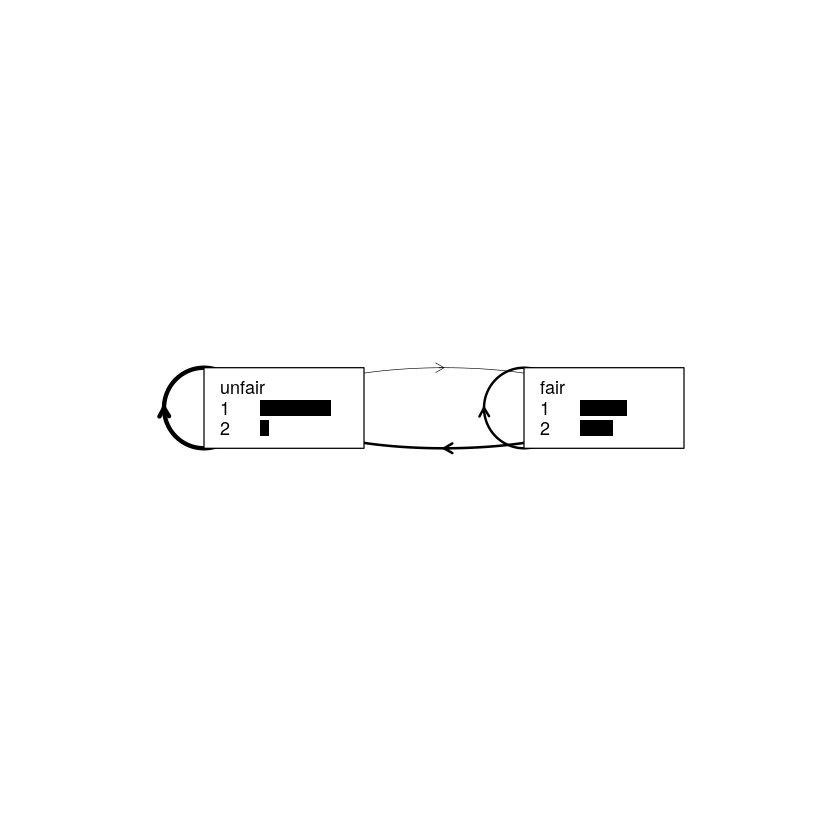

In [20]:
print(hmm_derived$A)
print(hmm_derived$E)
plot(hmm_derived, textexp = 1.5)

In [21]:
# print(deriveHMM)

### Baum-Welch and Viterbi training
(No hidden states given, only observable (emission))

Train with $P(Fair/Unfair|begin)=[0.5, 0.5]$

Initial model:

In [22]:
states <- c("Begin", "unfair", "fair")
coins <- 1:2

### Define transition probability matrix A
iA <- matrix(c(0, 0, 0,
              0.5, 0.5, 0.5,
              0.5, 0.5, 0.5), nrow = 3)
dimnames(iA) <- list(from = states, to = states)
print(iA)

### Define emission probability matrix E
iE <- matrix(c(0.5, 0.5,
               0.5, 0.5), nrow = 2, byrow = TRUE)
print(states[-1])
dimnames(iE) <- list(states = states[-1], coins = coins)
print(iE)

### Create the HMM object
hmm_initial1 <- structure(list(
    A = iA, E = iE), class = "HMM")
# par(fin=c(5,3))
# plot(hmm_initial,textexp = 1.5)


        to
from     Begin unfair fair
  Begin      0    0,5  0,5
  unfair     0    0,5  0,5
  fair       0    0,5  0,5
[1] "unfair" "fair"  
        coins
states     1   2
  unfair 0,5 0,5
  fair   0,5 0,5


In [23]:
# train data:
observable_only = c("1", "2")[match(observations$observation, c("L", "R"))]
observable_only[1:7]

[1] "1" "2" "1" "1" "1" "1" "1"

BaumWelch:

In [24]:
hmm_trained_bw <- train(hmm_initial1, observable_only, method = "BaumWelch", 
                        deltaLL = 0.01, seqweights = NULL)

Iteration 1 log likelihood = -207,9442 
Iteration 2 log likelihood = -135,1889 
Iteration 3 log likelihood = -135,1889 
Convergence threshold reached after 3 EM iterations


Results:

In [25]:
print(hmm_trained_bw$A)
print(hmm_trained_bw$E)

        to
from     Begin unfair fair
  Begin      0    0,5  0,5
  unfair     0    0,5  0,5
  fair       0    0,5  0,5
        coins
states           1         2
  unfair 0,8289474 0,1710526
  fair   0,8289474 0,1710526


Viterbi:

In [26]:
hmm_trained_v <- train(hmm_initial1, observable_only, method = "Viterbi", 
                       deltaLL = 0.01, seqweights = NULL)

Iteration 1 
Iteration 2 
Iteration 3 
Iteration 4 
Iteration 5 
Iteration 6 
Iteration 7 
Paths were identical after 7 iterations


Results:

In [27]:
print(hmm_trained_v$A)
print(hmm_trained_v$E)

        to
from     Begin      unfair      fair
  Begin      0 0,333333333 0,6666667
  unfair     0 0,500000000 0,5000000
  fair       0 0,003322259 0,9966777
        residue
state            1         2
  unfair 0,5000000 0,5000000
  fair   0,8311258 0,1688742


So both algorithms give bad results.

Train with $P(Fair/Unfair|begin)=[0.9, 0.1]$<br>
(same init as for original):

In [28]:
states <- c("Begin", "unfair", "fair")
coins <- 1:2

### Define transition probability matrix A
iA1 <- matrix(c(0, 0, 0,
              0.9, 0.5, 0.5,
              0.1, 0.5, 0.5), nrow = 3)
dimnames(iA1) <- list(from = states, to = states)
print(iA1)

### Define emission probability matrix E
iE1 <- matrix(c(0.5, 0.5,
                0.5, 0.5), nrow = 2, byrow = TRUE)
print(states[-1])
dimnames(iE1) <- list(states = states[-1], coins = coins)
print(iE1)

### Create the HMM object
hmm_initial12 <- structure(list(
    A = iA1, E = iE1), class = "HMM")
# par(fin=c(5,3))
# plot(hmm_initial,textexp = 1.5)


        to
from     Begin unfair fair
  Begin      0    0,9  0,1
  unfair     0    0,5  0,5
  fair       0    0,5  0,5
[1] "unfair" "fair"  
        coins
states     1   2
  unfair 0,5 0,5
  fair   0,5 0,5


BaumWelch:

In [29]:
hmm_trained_bw1 <- train(hmm_initial12, observable_only, method = "BaumWelch", 
                         deltaLL = 0.01, seqweights = NULL)


Iteration 1 log likelihood = -207,9442 
Iteration 2 log likelihood = -135,1887 
Iteration 3 log likelihood = -135,1888 
Convergence threshold reached after 3 EM iterations


Results:

In [30]:
print(hmm_trained_bw1$A)
print(hmm_trained_bw1$E)

        to
from     Begin    unfair      fair
  Begin      0 0,5149596 0,4850404
  unfair     0 0,5000120 0,4999880
  fair       0 0,5000155 0,4999845
        coins
states           1         2
  unfair 0,8295631 0,1704369
  fair   0,8283313 0,1716687


Viterbi:

In [31]:
hmm_trained_v1 <- train(hmm_initial12, observable_only, method = "Viterbi", 
                        deltaLL = 0.001, maxiter=300, seqweights = NULL)


Iteration 1 
Iteration 2 
Iteration 3 
Iteration 4 
Iteration 5 
Iteration 6 
Iteration 7 
Iteration 8 
Iteration 9 
Iteration 10 
Iteration 11 
Iteration 12 
Iteration 13 
Iteration 14 
Iteration 15 
Iteration 16 
Iteration 17 
Iteration 18 
Iteration 19 
Iteration 20 
Iteration 21 
Iteration 22 
Iteration 23 
Iteration 24 
Iteration 25 
Iteration 26 
Iteration 27 
Iteration 28 
Iteration 29 
Iteration 30 
Iteration 31 
Iteration 32 
Iteration 33 
Iteration 34 
Iteration 35 
Iteration 36 
Iteration 37 
Iteration 38 
Iteration 39 
Iteration 40 
Iteration 41 
Iteration 42 
Iteration 43 
Iteration 44 
Iteration 45 
Iteration 46 
Iteration 47 
Iteration 48 
Iteration 49 
Iteration 50 
Paths were identical after 50 iterations


Results:

In [32]:
print(hmm_trained_v1$A)
print(hmm_trained_v1$E)

        to
from     Begin    unfair       fair
  Begin      0 0,6666667 0,33333333
  unfair     0 0,8249027 0,17509728
  fair       0 0,9782609 0,02173913
        residue
state             1          2
  unfair 0,97286822 0,02713178
  fair   0,02173913 0,97826087


Sometimes good, some not.

Try using several seq's instead of one:

In [33]:
observations = simHMM(hmm_original, 1000)

# train data:
observable_only = c("1", "2")[match(observations$observation, c("L", "R"))]
observable_only[1:7]

[1] "1" "1" "1" "1" "1" "1" "1"

In [34]:
# create 10 examples:
seqs = list(length=100)
l = 100
for(i in 0:(l-1))
{
    if(((i+1)*l+i) <=1000)
        {
         seqs[[i+1]]<-observable_only[(i*l+i):((i+1)*l+i)]
        }
}
# seqs

In [35]:
seqs

$length
  [1] "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "2" "1" "1" "1" "1" "1" "1" "1"
 [19] "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "2" "1" "1" "1" "1" "1" "1" "1"
 [37] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "2"
 [55] "1" "1" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1"
 [73] "1" "2" "1" "2" "2" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2"
 [91] "2" "1" "2" "1" "1" "1" "1" "1" "2" "1"

[[2]]
  [1] "2" "1" "2" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [19] "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "2"
 [37] "1" "1" "1" "1" "1" "2" "1" "1" "1" "2" "1" "1" "2" "1" "1" "2" "1" "1"
 [55] "1" "1" "1" "1" "2" "1" "1" "1" "1" "2" "1" "1" "1" "2" "1" "1" "1" "1"
 [73] "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "2"
 [91] "1" "1" "1" "1" "1" "1" "1" "2" "1" "2" "2"

[[3]]
  [1] "1" "1" "1" "1" "2" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [19] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "2" "1"
 [37] "1" "1" "1" "1" "1" "1" "2" "2" "1" "1" "1" "1" "1" "1" "1" "2" "2" "1"
 [55] "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "2" "1" "1" "1" "1" "1" "1" "1"
 [73] "1" "2" "1" "2" "1" "1" "1" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [91] "1" "1" "2" "2" "1" "1" "1" "1" "1" "1" "2"

[[4]]
  [1] "1" "2" "2" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "1" "2" "2"
 [19] "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "1"
 [37] "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [55] "2" "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "1" "1" "1" "2" "1" "2"
 [73] "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [91] "1" "1" "1" "2" "1" "2" "1" "1" "1" "1" "1"

[[5]]
  [1] "1" "1" "1" "1" "1" "1" "1" "2" "2" "2" "2" "2" "1" "1" "1" "2" "1" "1"
 [19] "1" "1" "1" "2" "1" "1" "2" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [37] "1" "2" "1" "2" "1" "2" "2" "1" "1" "1" "1" "1" "2" "2" "2" "2" "2" "1"
 [55] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [73] "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [91] "2" "1" "1" "2" "1" "2" "1" "1" "1" "1" "2"

[[6]]
  [1] "2" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1"
 [19] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "2" "2" "1" "2"
 [37] "2" "2" "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "1" "2" "1" "1" "1"
 [55] "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "1" "1" "2" "1" "2"
 [73] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "2" "1" "2"
 [91] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"

[[7]]
  [1] "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "2" "1" "1" "1" "1" "1"
 [19] "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "2" "1" "1" "1" "2"
 [37] "1" "1" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [55] "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "2" "1" "1" "1" "1" "1" "1" "1"
 [73] "1" "1" "1" "1" "1" "2" "1" "1" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1"
 [91] "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "1"

[[8]]
  [1] "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "1"
 [19] "1" "1" "1" "1" "1" "1" "2" "2" "1" "1" "1" "1" "1" "1" "2" "1" "2" "1"
 [37] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1"
 [55] "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1"
 [73] "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1"
 [91] "1" "2" "2" "1" "1" "1" "1" "1" "1" "2" "1"

[[9]]
  [1] "1" "1" "2" "2" "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "1" "2" "1"
 [19] "1" "1" "1" "1" "1" "2" "1" "2" "1" "2" "2" "1" "2" "1" "1" "1" "1" "1"
 [37] "2" "1" "1" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [55] "1" "1" "2" "1" "2" "1" "2" "1" "1" "1" "2" "1" "1" "1" "1" "1" "1" "1"
 [73] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "2" "1" "1" "1" "1"
 [91] "1" "1" "1" "2" "1" "1" 

In [36]:
hmm_trained_v1 <- train(hmm_initial1, seqs, method = "Viterbi", 
                        deltaLL = 0.001, maxiter=300, seqweights = NULL)


Iteration 1 
Iteration 2 
Iteration 3 
Paths were identical after 3 iterations


In [37]:
print(hmm_trained_v1$A)
print(hmm_trained_v1$E)

        to
from     Begin    unfair        fair
  Begin      0 0,9090909 0,090909091
  unfair     0 0,9988901 0,001109878
  fair       0 0,5000000 0,500000000
        residue
state            1         2
  unfair 0,8351648 0,1648352
  fair   0,5000000 0,5000000


Worse?

### Profile HMM:

In [38]:
data(globins)
globins

HBA_HUMAN,V,G,A,-,-,H,A,G,E,Y
HBB_HUMAN,V,-,-,-,-,N,V,D,E,V
MYG_PHYCA,V,E,A,-,-,D,V,A,G,H
GLB3_CHITP,V,K,G,-,-,-,-,-,-,D
GLB5_PETMA,V,Y,S,-,-,T,Y,E,T,S
LGB2_LUPLU,F,N,A,-,-,N,I,P,K,H
GLB1_GLYDI,I,A,G,A,D,N,G,A,G,V


derives a profile HMM from the globin data and plots the model:

In [39]:
globins.PHMM <- derivePHMM(globins, residues = "AMINO", pseudocounts = "Laplace")

Applying uniform sequence weights


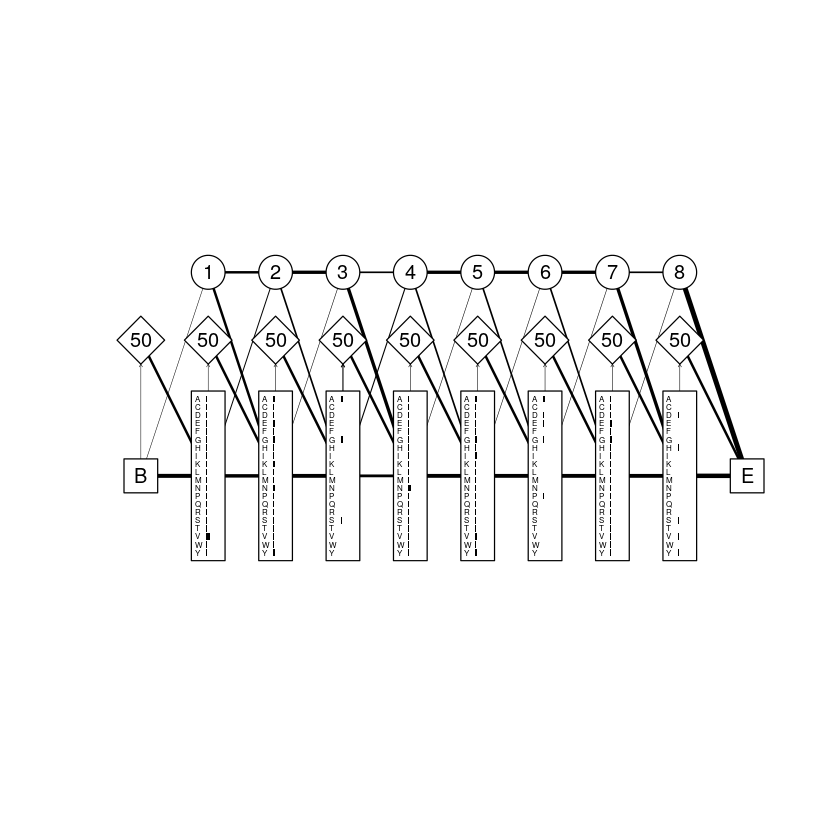

In [41]:
plot(globins.PHMM)

In [43]:
path <- Viterbi(globins.PHMM, globins["GLB1_GLYDI", ])$path
# path
c("D", "M", "I")[path + 1]

[1] "M" "M" "M" "I" "I" "M" "M" "M" "M" "M"